Kepler's 3rd law:

$T^{2} = R^{3}$ 
when T is measured in years and R is measured in AU

In [1]:
import numpy as np
import pandas as pd

In [2]:
def obtain_R(T): # Find average radius(R) of an orbit given the time period(T)
    R_cube = T**2
    R = np.round(R_cube**(1./3), 5)
    return R

In [3]:
x = np.random.uniform(0,1000,100000) #Genrate 100000 random time period values between 0 and 100
x

array([188.95243191, 351.20419265,  18.02903068, ...,  10.24508159,
       631.72791807, 920.82947734])

In [4]:
y = obtain_R(x) # Obtain avg. radius of orbit(R) for each of the 100000 generated time period values
y

array([32.92823, 49.77827,  6.87567, ...,  4.71712, 73.62411, 94.64975])

In [5]:
x= x.reshape(100000,1)
y = y.reshape(100000,1)

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# Construct regression model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))
model.output_shape

(None, 1)

In [8]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train model
history = model.fit(
          x, y,
          validation_split=0.2,
          epochs=50)

Epoch 1/50
2500/2500 [==============================] - 9s 3ms/step - loss: 6.4346 - val_loss: 2.0505
Epoch 2/50
2500/2500 [==============================] - 6s 2ms/step - loss: 1.9568 - val_loss: 1.7978
Epoch 3/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.2322 - val_loss: 0.9413
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.8917 - val_loss: 0.5053
Epoch 5/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.7165 - val_loss: 1.1344
Epoch 6/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6837 - val_loss: 0.2453
Epoch 7/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6063 - val_loss: 0.5556
Epoch 8/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5209 - val_loss: 0.6346
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5631 - val_loss: 0.1107
Epoch 10/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.

In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

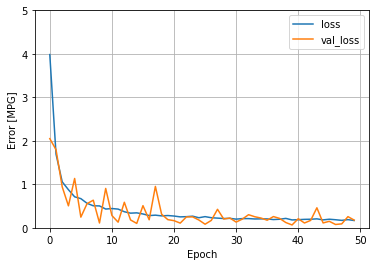

In [12]:
plot_loss(history)

This model is trained to reduce mean absolute error(MAE). MAE is the average difference between the predicted and true values

$MAE = \frac{\sum \limits_{i=1}^{n} |y_{i}-x_{i}|}{n}$

In [13]:
print("Mean absolute error of model: ", history.history['val_loss'][-2])

Mean absolute error of model:  0.25668907165527344


In [14]:
a = tf.linspace(0.0, 250, 251)
b = obtain_R(a)

In [15]:
def plot_predictions(x, y):
  plt.scatter(x, y, label='Data')
  p = model.predict(x)
  plt.plot(x, p, color='k', label='Predictions')
  plt.xlabel('T (Time period of orbit in yrs)')
  plt.ylabel('R (Average radius of orbit in AU)')
  plt.legend()

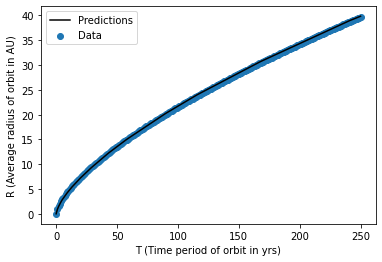

In [16]:
plot_predictions(a,b)

The blue dots in the plot are data points fed into the ML model, and the black line is the predicted vaue for each of them

Predicting for earth:

In [17]:
T_earth = [1] #in years
R_earth = model.predict(T_earth) #True value: 1 AU
print("Actual dist. of eath from sun: 1 AU")
print("Dist. predicted: ", R_earth[0][0], "AU")

Actual dist. of eath from sun: 1 AU
Dist. predicted:  0.9034554 AU


Predicting for jupiter:

In [18]:
T_jupiter = [11.86] #in years
R_jupiter = model.predict(T_jupiter) #True value: 5.2 AU
print("Actual dist. of jupiter from sun: 5.2 AU")
print("Dist. predicted: ", R_jupiter[0][0], "AU")

Actual dist. of jupiter from sun: 5.203 AU
Dist. predicted:  5.0907764 AU


In [19]:
model.save('kepler_model.h5')